<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Sales       200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB

Number of outliers are 
 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


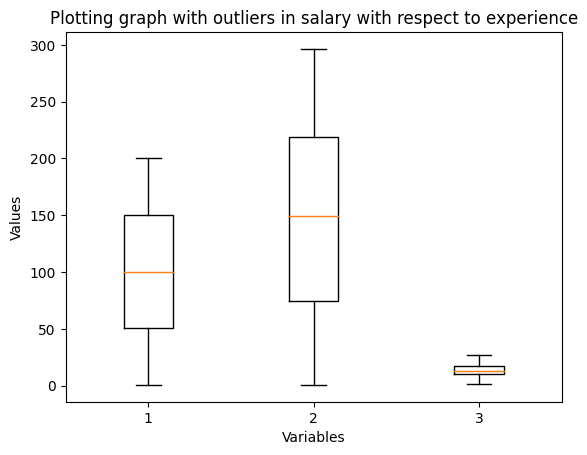

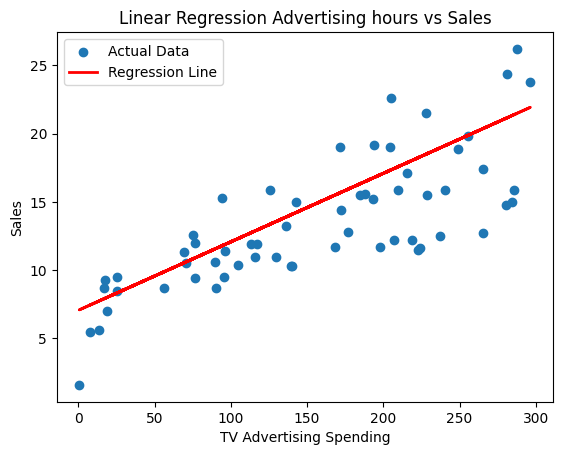

Mean Squared Error: 11.255102587515921
R2 _score: 0.4958482412886632

Predict Sales from spending 204 hours for Advertising in TV: $17.292108878669083 


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Load the Advertising dataset
data = pd.read_csv("C:\\Users\\ABHISHEK KUMAR\\Downloads\\Advertising.csv")
data.dropna(axis=0,inplace=True)
data.info()
print()

# Use "TV" advertising spending as the independent variable and "Sales" as the dependent variable
X = data["TV"].values.reshape(-1, 1)
y = data["Sales"]

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=32)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


#Finding the upper and lower bound range of the data
q1 = data["TV"].quantile(.25)
q3 = data['Sales'].quantile(.75)
IQR = q3 - q1
l_b = q1 - 1.5 * IQR
u_b = q3 + 1.5 * IQR



#Ploting for outliers
plt.boxplot(data)
plt.title("Plotting graph with outliers in salary with respect to experience")
plt.ylabel("Values")
plt.xlabel("Variables")
plt.show()

# Plot the training data and the regression line
plt.scatter(X_test,y_test,label='Actual Data')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Regression Line')
plt.title('Linear Regression Advertising hours vs Sales')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)
print("R2 _score:",r2_score(y_test,y_pred))

#Predicting with test value
h=[[204]]
s=model.predict(h)
print(f"\nPredict Sales from spending {h[0][0]} hours for Advertising in TV: ${s[0]} ")

Unnamed: 0    0
TV            0
Sales         0
dtype: int64
Outliers:
 0
0.7965415078352629
MSE: 3.3396490737888613
Root: 1.8274706765879614


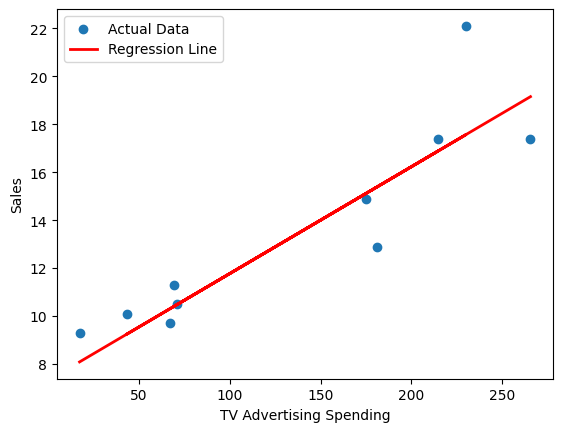

Predict Sales for 203,Advertising Spending: 16.3626743685564 
33    17.4
29    10.5
49     9.7
38    10.1
45    14.9
0     22.1
18    11.3
4     12.9
11    17.4
2      9.3
Name: Sales, dtype: float64
[[19.1505588 ]
 [10.46625426]
 [10.30147515]
 [ 9.24154464]
 [15.1201508 ]
 [17.56957003]
 [10.40390541]
 [15.3739997 ]
 [16.88373264]
 [ 8.08809086]]


In [4]:
# Import necessary libraries
import pandas as pd;import math
import numpy as np
import seaborn as s
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Load the Advertising dataset
data = pd.read_csv("C:\\Users\\ABHISHEK KUMAR\\Downloads\\Advertising.csv").head(50)
#data.dropna(axis=0,inplace=True)
print(data.isna().sum())

q1=data['TV'].quantile(0.25)
q3=data['TV'].quantile(0.75)
iq=q3-q1

low=q1-1.5*iq
high=q3+1.5*iq
out=(data['TV']<=low)|(data['TV']>=high)
print("Outliers:\n",out.sum())
mean_in=data['TV'][(data['TV']>=low)&(data['TV']<=high)].mean()
data.loc[out,'TV']=mean_in

# Use "TV" advertising spending as the independent variable and "Sales" as the dependent variable
X = data["TV"].values.reshape(-1, 1)
y = data["Sales"]

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
n=math.sqrt(mse)
print(r2_score(y_test,y_pred))
print("MSE:",mse)
print("Root:",n)
# Plot the training data and the regression line

plt.scatter(X_test,y_test,label='Actual Data')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Regression Line')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.legend()
plt.show()



e=[[203]]
s=model.predict(e)
print(f"Predict Sales for {e[0][0]},Advertising Spending: {s[0]} ")
print(y_test)
a = y_pred.reshape(-1,1)
print(a)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int64  
 1   TV          50 non-null     float64
 2   Sales       50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB

Missing number of values before imputing:
 Unnamed: 0    0
TV            0
Sales         0
dtype: int64

Missing number of values after imputing:
 Unnamed: 0    0
TV            0
Sales         0
dtype: int64


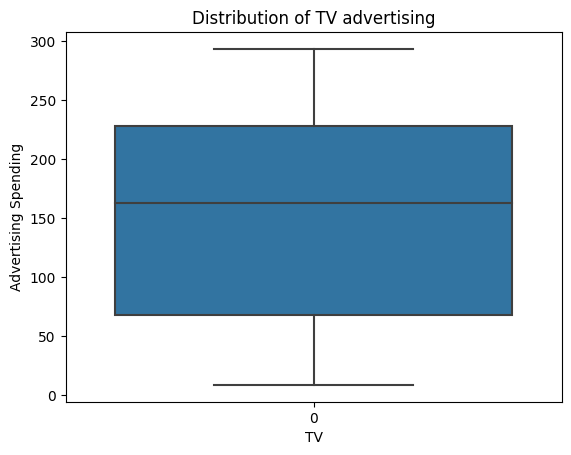

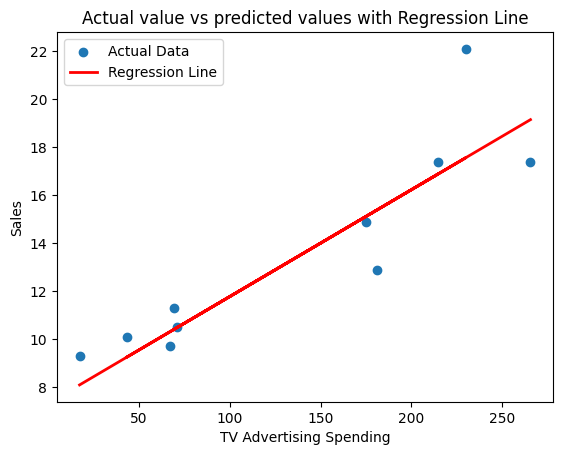

R2: 0.7965415078352629
MSE: 3.3396490737888613
Predict Sales for 203,Advertising Spending: 16.3626743685564 


In [1]:
# Load the Advertising dataset
import pandas as pd
data = pd.read_csv("C:\\Users\\ABHISHEK KUMAR\\Downloads\\Advertising.csv").head(50)

#Preprocessing the data
print("Information:")
data.info()
print("\nMissing number of values before imputing:\n",data.isna().sum())
data=data.fillna(data.mean())
print("\nMissing number of values after imputing:\n",data.isna().sum())

#Dealing with outliers
import seaborn as s
import matplotlib.pyplot as plt
s.boxplot(data['TV'])
plt.title('Distribution of TV advertising')
plt.xlabel('TV')
plt.ylabel('Advertising Spending')
plt.show()

# Use "TV" advertising spending as the independent variable and "Sales" as the dependent variable
X = data["TV"].values.reshape(-1, 1)
y = data["Sales"]

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the training data and the regression line
plt.scatter(X_test,y_test,label='Actual Data')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Regression Line')
plt.title("Actual value vs predicted values with Regression Line")
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE) and R2_score to evaluate the model's performance
r=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:",r)
print("MSE:",mse)

#Model working demo
e=[[203]]
s=model.predict(e)
print(f"Predict Sales for {e[0][0]},Advertising Spending: {s[0]} ")